## کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score 
import statistics

## فایل سی اس وی

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')


## ساخت دیتا فریم از روی فایل سی اس وی

In [3]:
df = pd.DataFrame(data)
df.Experience =  np.abs(df.Experience)

In [4]:
# a = "1/35"
# b = a.replace("/", ".")
# b

## تبدیل فایل استرینگ به انتیجر و جبجایی "/" با "."

In [5]:
CCAvg = []
for num in df.CCAvg:
    CCAvg.append(num.replace("/", "."))
df.CCAvg = pd.DataFrame(CCAvg)

df['CCAvg'] = pd.to_numeric(df['CCAvg'])


## دیتافریم

In [6]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## اطلاعات تکمیلی در مورد دیتافریم

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


بررسی کلی از دیتاست

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## بررسی میسینگ ولیو موجود در دیتافریم و تعداد و مکان آن

In [9]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن سن های افرادی که وام دریافت کردند

In [10]:
list_of_index = []
ages = []
for index, num in enumerate(df['Personal Loan']):
    if num == 1:
        list_of_index.append(index)

for i in list_of_index:
    ages.append(df['Age'][i])
df_age = pd.DataFrame(ages, columns=['Age'])
df_age.sort_values(by='Age', inplace=True)

طبقه بندی افرادی که وام دریافت کرده اند بر اساس سن برای رسم نمودار بصری

In [11]:
print(df['Age'].unique())

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


In [12]:
age_0_35 = []
age_35_49 = []
age_50_65 = []
age65 = []
for i in df_age.Age:
    if i < 35:
        age_0_35.append(i)
    if  49 > i >= 35:
        age_35_49.append(i)
    if 65 > i >= 49:
        age_50_65.append(i)
    if i >=65:
        age65.append(i)
print(len(age_0_35))
print(len(age_35_49))
print(len(age_50_65))
print(len(age65))
print(len(df_age))

print(f'percentage of < 35 : {len(age_0_35) /len(df_age)}')
print(f'percentage of 35-49 : {len(age_35_49) /len(df_age)}')
print(f'percentage of 50-65 : {len(age_50_65) /len(df_age)}')
print(f'percentage of > 65 : {len(age65) /len(df_age)}')

118
165
183
14
480
percentage of < 35 : 0.24583333333333332
percentage of 35-49 : 0.34375
percentage of 50-65 : 0.38125
percentage of > 65 : 0.029166666666666667


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن تعداد افراد خانواده که وام دریافت کردند

In [13]:
print(df['Family'].unique())

[4 3 1 2]


In [14]:
family = []
for i in list_of_index:
    family.append(df['Family'][i])
df_family = pd.DataFrame(family, columns=['Family'])
df_family.sort_values(by='Family', inplace=True)

In [15]:
# df_family

طبقه بندی افرادی که وام دریافت کرده اند بر اساس تعداد افراد خانواده برای رسم نمودار بصری

In [16]:
one_family = 0
two_family = 0
three_family = 0
four_family = 0
for count in df_family.Family:
    if count == 1:
        one_family += 1
    if count == 2:
        two_family += 1
    if count == 3:
        three_family += 1
    if count == 4:
        four_family += 1
print(one_family)
print(two_family)
print(three_family)
print(four_family)
print(len(df_family.Family))

print(f'percentage of one_family : {one_family / len(df_family.Family)}')
print(f'percentage of two_family : {two_family / len(df_family.Family)}')
print(f'percentage of three_family : {three_family / len(df_family.Family)}')
print(f'percentage of four_family : {four_family / len(df_family.Family)}')
         

107
106
133
134
480
percentage of one_family : 0.22291666666666668
percentage of two_family : 0.22083333333333333
percentage of three_family : 0.27708333333333335
percentage of four_family : 0.2791666666666667


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن تحصیلات افرادی  که وام دریافت کردند

In [17]:
print(df['Education'].unique())

[1 2 3]


In [18]:
education = []
for i in list_of_index:
    education.append(df['Education'][i])
df_education = pd.DataFrame(education, columns=['Education'])
df_education.sort_values(by='Education', inplace=True)
# df_education

طبقه بندی افرادی که وام دریافت کرده اند بر اساس تحصیلات افراد برای رسم نمودار بصری

In [19]:
Education1 = 0
Education2 = 0
Education3 = 0
for counter in education:
    if counter == 1:
        Education1 += 1
    if counter == 2:
        Education2 += 1
    if counter == 3:
        Education3 += 1

print(Education1)
print(Education2)
print(Education3)
print(len(df_education.Education))
print(f'percentage of Education1 : {Education1 / len(df_education.Education)}')
print(f'percentage of Education2  : {Education2 / len(df_education.Education)}')
print(f'percentage of Education3 : {Education3 / len(df_education.Education)}')


93
182
205
480
percentage of Education1 : 0.19375
percentage of Education2  : 0.37916666666666665
percentage of Education3 : 0.4270833333333333


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن  کسانی که از کارت اعتباری استفاده میکنند یا نمیکنن  و وام دریافت کردند

In [20]:
print(df.CreditCard.unique())

[0 1]


In [21]:
credit_cart_use = []
for i in list_of_index:
    credit_cart_use.append(df['CreditCard'][i])
df_credit_cart = pd.DataFrame(credit_cart_use, columns=['CreditCard'])
df_credit_cart.sort_values(by='CreditCard', inplace=True)
# df_credit_cart

طبقه بندی افرادی که وام دریافت کرده اند بر اساس استفاده کردن یانکردن از کارت اعتباری افراد برای رسم نمودار بصری

In [22]:
use_creditcart = 0
dontuse_creditcart = 0
for counter_Ck in credit_cart_use:
    if counter_Ck == 1:
        use_creditcart +=1
    else:
        dontuse_creditcart +=1
print(use_creditcart)
print(dontuse_creditcart)
print(f'percentage of use_creditcart  : {use_creditcart / len(df_credit_cart.CreditCard)}')
print(f'percentage of dontuse_creditcart : {dontuse_creditcart / len(df_credit_cart.CreditCard)}')



143
337
percentage of use_creditcart  : 0.29791666666666666
percentage of dontuse_creditcart : 0.7020833333333333


In [23]:
# 143/480

In [24]:
# 337/480

 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن  افرادی بر اساس استفاده کردن یا نکردن از خدمات انلاین  و دریافت وام 

In [25]:
online = []
for i in list_of_index:
    online.append(df['Online'][i])
df_online = pd.DataFrame(online, columns=['Online'])
df_online.sort_values(by='Online', inplace=True)
# df_online

طبقه بندی افرادی که وام دریافت کرده اند بر اساس استفاده کردن یانکردن از خدمات انلاین برای رسم نمودار بصری

In [26]:
use_online = 0
dontuse_online = 0
for counter_on in online:
    if counter_on == 1:
        use_online += 1
    else:
        dontuse_online += 1
print(use_online)
print(dontuse_online)
print(f'percentage of use_online  : {use_online / len(df_online.Online)}')
print(f'percentage of dontuse_online : {dontuse_online / len(df_online.Online)}')

291
189
percentage of use_online  : 0.60625
percentage of dontuse_online : 0.39375


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن  افرادی بر اساس تجربه یا سابقه کاری و دریافت وام 

In [27]:
experience = []
for i in list_of_index:
    experience.append(df['Experience'][i])
df_experience = pd.DataFrame(experience, columns=['Experience'])
df_experience.sort_values(by='Experience', inplace=True)
# df_experience

طبقه بندی افرادی که وام دریافت کرده اند بر اساس تجربه یا سابقه کاری برای رسم نمودار بصری

In [28]:

experience0_10 = 0
experience10_20 = 0
experience20_30 = 0
experience30_43 = 0
for counter_Ex in experience:
    if counter_Ex < 10:
        experience0_10 += 1
    if 20 > counter_Ex >= 10:
        experience10_20 += 1
    if 30 > counter_Ex >= 20:
        experience20_30 += 1
    if counter_Ex >= 30:
        experience30_43 += 1


print(len(df_experience.Experience))
print(f"percentage of experience0_9 : {experience0_10 / len(df_experience.Experience)}")
print(f"percentage of experience10_19 : {experience10_20 / len(df_experience.Experience)}")
print(f"percentage of experience20_29 : {experience20_30 / len(df_experience.Experience)}")
print(f"percentage of experience30_43 : {experience30_43 / len(df_experience.Experience)}")


480
percentage of experience0_9 : 0.2625
percentage of experience10_19 : 0.225
percentage of experience20_29 : 0.25625
percentage of experience30_43 : 0.25625


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن  افرادی بر اساس درامد و دریافت وام 

In [29]:
income = []
for i in list_of_index:
    income.append(df['Income'][i])
df_income = pd.DataFrame(income, columns=['Income'])
df_income.sort_values(by='Income', inplace=True)
# df_income

طبقه بندی افرادی که وام دریافت کرده اند بر اساس درامد برای رسم نمودار بصری

In [30]:
income60_100 = 0
income100_150 = 0
income150_203 = 0
for counter_in in income:
    if counter_in < 100:
        income60_100 += 1
    if 150 > counter_in >= 100:
        income100_150 += 1
    if 203 > counter_in >= 150:
        income150_203 += 1
    

print(income60_100)
print(len(df_income.Income))
print(f"percentage of income60_100 : {income60_100 / len(df_income.Income)}")
print(f"percentage of income100_150 : {income100_150 / len(df_income.Income)}")
print(f"percentage of income150_203 : {income150_203 / len(df_income.Income)}")


41
480
percentage of income60_100 : 0.08541666666666667
percentage of income100_150 : 0.45625
percentage of income150_203 : 0.45625


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن   بر اساس فعال بودن سکیوریتی اکانت و دریافت وام 

In [31]:
secur_acc = []
for i in list_of_index:
    secur_acc.append(df['Securities Account'][i])
df_SA = pd.DataFrame(secur_acc, columns=['Securities Account'])
df_SA.sort_values(by='Securities Account', inplace=True)

طبقه بندی افرادی که وام دریافت کرده اند بر اساس فعال بودن یا نبودن سکیوریتی اکانت برای رسم نمودار بصری

In [32]:
use_secur_acc = 0
dontuse_secur_acc = 0
for count_sa in secur_acc:
    if count_sa == 1:
        use_secur_acc += 1
    if count_sa == 0:
        dontuse_secur_acc += 1

print(f"percentage of use security accont :{use_secur_acc / len(df_SA['Securities Account'])}")
print(f"percentage of dont use security accont : {dontuse_secur_acc / len(df_SA['Securities Account'])}")


percentage of use security accont :0.125
percentage of dont use security accont : 0.875


 پیدا کردن ایندکس دیتاهایی که وام دریافت کردند و از طریق ان یافتن افراد بر اساس سی دی اکانت  و دریافت وام 

In [33]:
cd_acc = []
for i in list_of_index:
    cd_acc.append(df['CD Account'][i])
df_CA = pd.DataFrame(cd_acc, columns=['CD Account'])
df_CA.sort_values(by='CD Account', inplace=True)

طبقه بندی افرادی که وام دریافت کرده اند بر اساس فعال بودن یا نبودن سی دی اکانت برای رسم نمودار بصری

In [34]:
use_cd_acc = 0
dontuse_cd_acc = 0
for count_ca in cd_acc:
    if count_ca == 1:
        use_cd_acc += 1
    if count_ca == 0:
        dontuse_cd_acc += 1

print(f"percentage of use cd accont :{use_cd_acc / len(df_CA['CD Account'])}")
print(f"percentage of dont use cd accont : {dontuse_cd_acc / len(df_CA['CD Account'])}")

percentage of use cd accont :0.2916666666666667
percentage of dont use cd accont : 0.7083333333333334


شمارش تعداد افراد بر اساس سن افراد

In [35]:
# sns.countplot(x='Age', data=df_age)
# plt.xticks(rotation=90)
# plt.show()

شمارش تعداد افراد بر اساس دریافت کردن یا نکردن وام

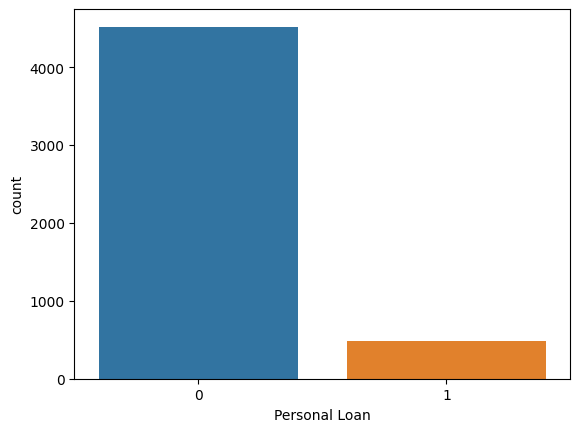

In [36]:
sns.countplot(x='Personal Loan', data=data)
plt.show()

شمارش تعداد افراد بر اساس سن افراد

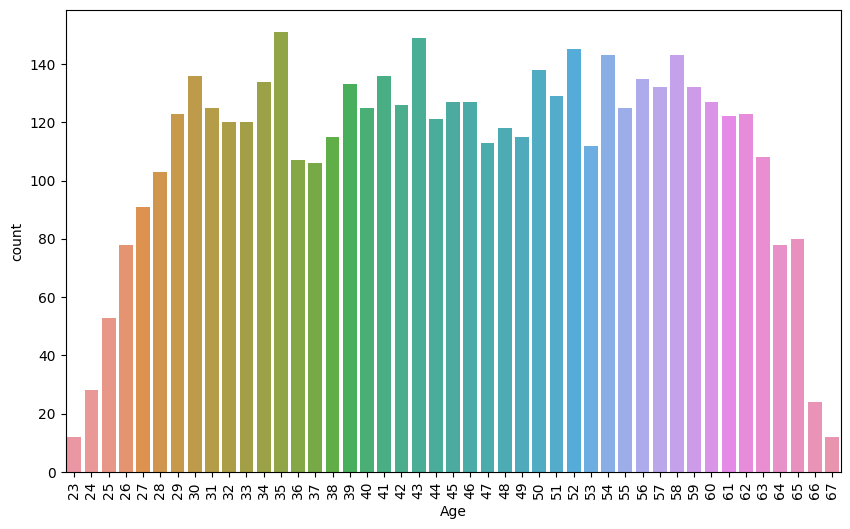

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=data)
plt.xticks(rotation= 90)
plt.show()

توزیع نرمال در سن مشاهده شد با توه با پلات بالا

# رسم پای چارت برای بررسی بصری فیچرها و دریافت وام

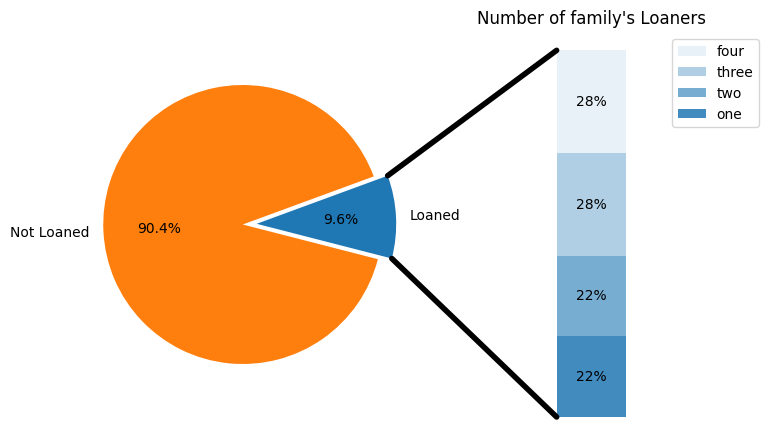

In [38]:

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.22, .22, .28, .28]
age_labels = ['one', 'two', 'three', 'four']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Number of family's Loaners")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Number_of_family.jpeg', dpi=1200)
plt.show()

پای چارت بالا نشان میدهد که از صد درصد افراد فقط تقریبا ۱۰ درصد وام دریافت کرده اند و در این بین افراد دارای یک و دو فرزند هر کدام ۲۲ درصد و افراد دارای سه و چهار فرزند با شش درصد افزایش هر کدام ۲۸ درصد وام را دریافت کرده اند

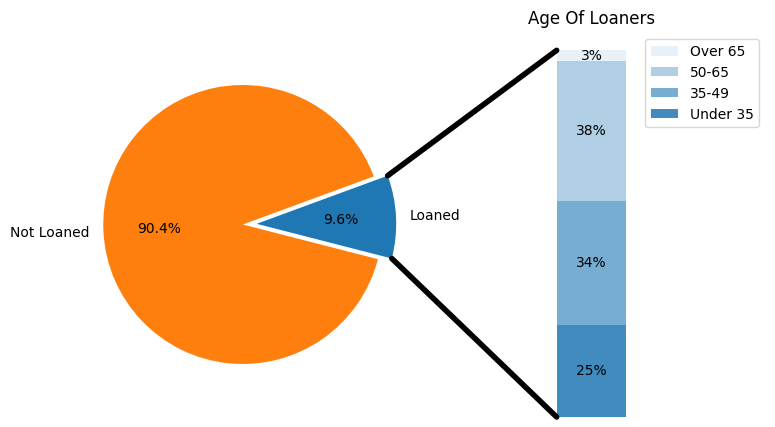

In [39]:

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.25, .34, .38, .03]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Age.jpeg', dpi=1200)
plt.show()

پای چارت بالا نشان میدهد که  افراد با سن مختلف دریافت وام مختلفی داشته اند  افراد زیر ۳۵ سال ۲۵ درصد وام و افراد بین ۳۵ تا ۴۹ حدود ۳۴ درصد وامها را دریافت کرده اند و بیشترین وام را افراد بین ۵۰ تا ۶۵ سال دریافت کرده اند و کمترین دریافت وام برای افراد بالای ۶۵ سال بوده است

In [40]:
# 46.73+47.17+ 37.59+ 37.31

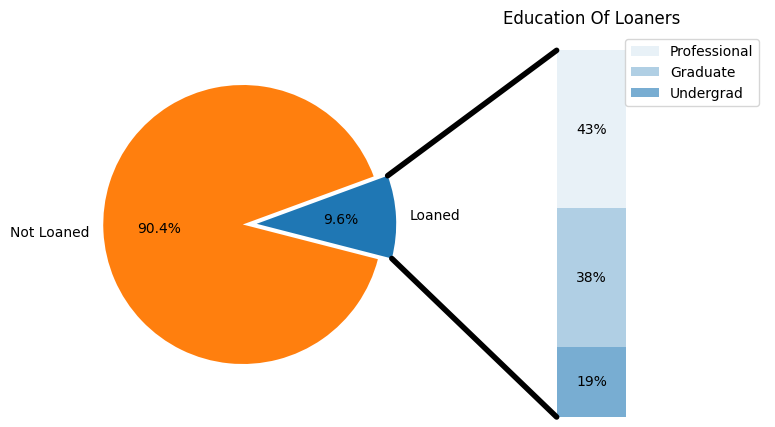

In [41]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.19, .38, .43]
age_labels = ['Undergrad', 'Graduate', 'Professional']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Education Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Education.jpeg', dpi=1200)

plt.show()

پای چارت بالا به طور واضح نشان میدهد با افزایش تحصیلات دریافت وام هم توسط افراد افزایش می یابد به طوری که افراد با تحصیلات عالیه حدود ۴۳ درصد از وام ها را بخود اختصاص داده اند 

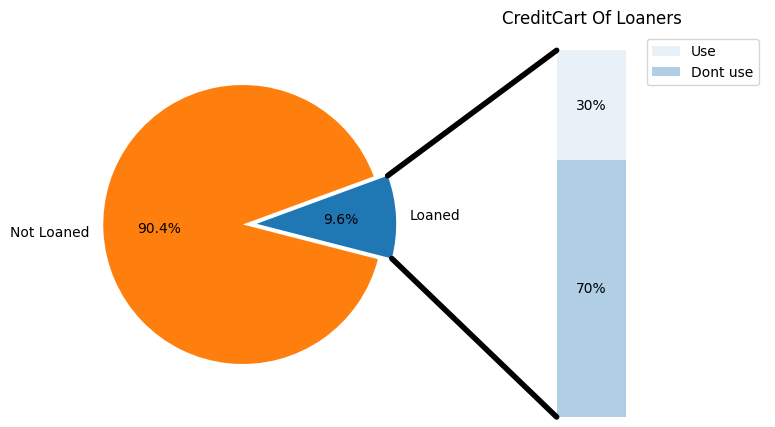

In [42]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.70, .30]
age_labels = ['Dont use', 'Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('CreditCart Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('CreditCart.jpeg', dpi=1200)
plt.show()

پای چارت بالا نشان میدهند افرادی که از کارت اعتباری خود هنوز استفاده نکردند تمایل خیلی بیشتری برای دریافت وام دارند و حدود ۷۰ درصد وام هارو دریافت کرده است و افرادی که از کارت اعتباری رو استفاده کردند حدود ۳۰ درصد وام گیرنده هارو به خود اختصاص داده است

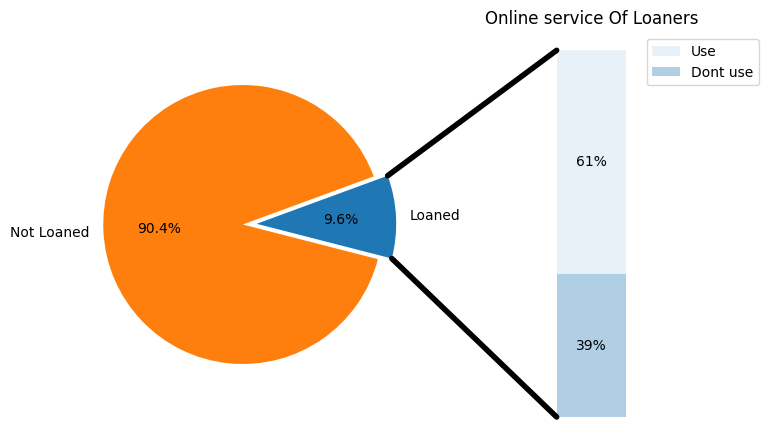

In [43]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.39, .61]
age_labels = ['Dont use', 'Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Online service Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Online_service.jpeg', dpi=1200)

plt.show()

پای چارت بالا نشان میدهد که افرادی که از انلاین سرویس استفاده نکرده اند وام بیشتری دریافت کرده اند و تمایل بیشتری داشته اند و حدود ۶۱ درصد وام را دریافت کرده اند و افرادی که از انلاین سرویس استفاده کردند ۳۹ درصد از وام را دریافت کرده اند 

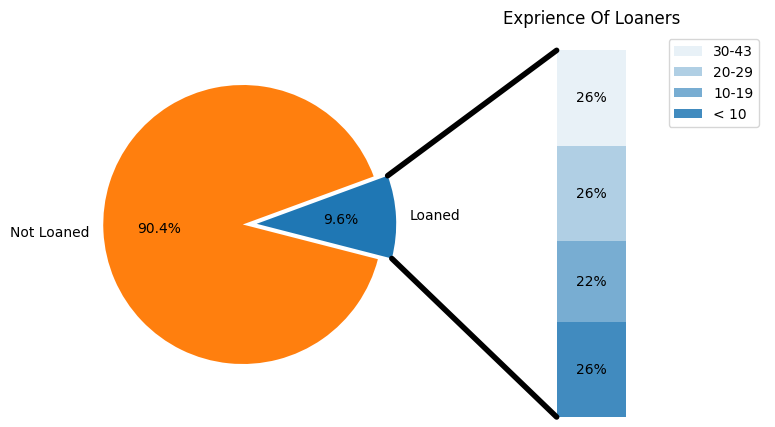

In [44]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.26, .22, .26, .26]
age_labels = ['< 10', '10-19', '20-29', '30-43']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Exprience Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Exprience.jpeg', dpi=1200)

plt.show()



پای چارت بالا نشان میدهد که تجربه یا سابقه کار در دریافت وام تاثیر متفاوتی داشته  جز افراد با سابقه کار ۱۰ تا ۱۹ سال  که حدود ۲۲ درصد وام گیرنده ها بوده اند بقیه افراد از کمتر از ۱۰ تا حدود ۴۱ سال ۲۶ درصد وام گینده ها بوده اند در اینجا سابقه تا ۴۳ سال بوده ولی بیشترین سابقه ۴۱ بوده که وام دریافت کرده است

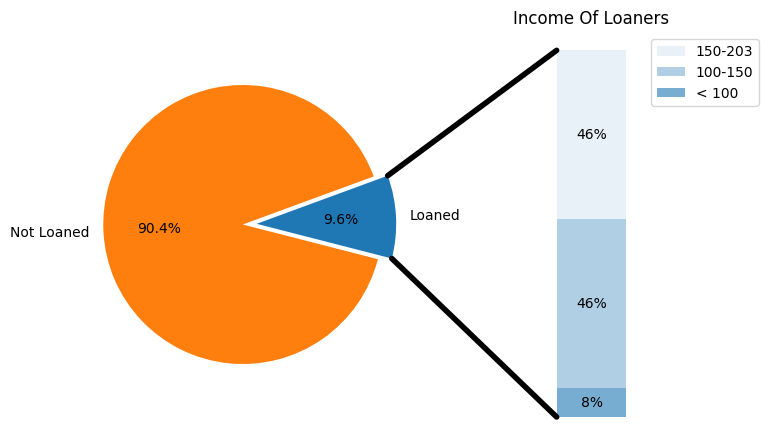

In [45]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.08, .46, .46]
age_labels = ['< 100', '100-150', '150-203']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Income Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Income.jpeg', dpi=1200)

plt.show()

پای چارت بالا نشان میدهد که درامد نقش مهمی در دریافت وام داشته و مشاهده میشود افراد با درامد زیر ۱۰۰ حدود ۸ درصد و افراد بالای ۱۰۰ تا ۲۰۳ با ۴۶ درصد بیشترین دریافت وام را د اشته اند اما نکته جالب اینجاست دامد از ۸ تا ۲۲۴ بوده که افراد زیر ۶۰ و بالای ۲۰۳ وام دریافت نکردند یعنی میشود به این نتیجه رسید افراد با درامد کم توان دریافت و باز پرداخت وام را نداشتند و افراد با درامد بالا نیاز به دریافت وام نداشته اند

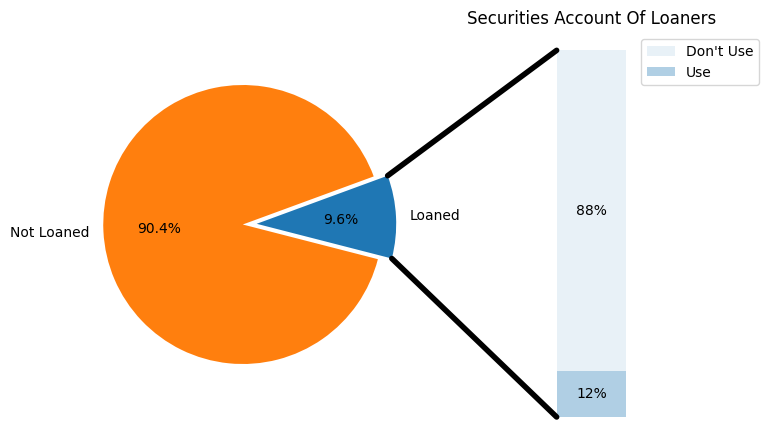

In [46]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.125, .875]
age_labels = ['Use', 'Don\'t Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Securities Account Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('Securities_Account.jpeg', dpi=1200)

plt.show()

پای چارت بالا نشان میدهد  افزایش معنی داری در تمایل افراد به وام گرفتن سکیوریتی اکانت انها دارد که افرادی که  از ان استفاده نکردد ۸۸ درصد وام گیرنده ها و افرادی که از ان استفاده کردند ۱۸ درصد وام گیرنده ها را شامل شدند 

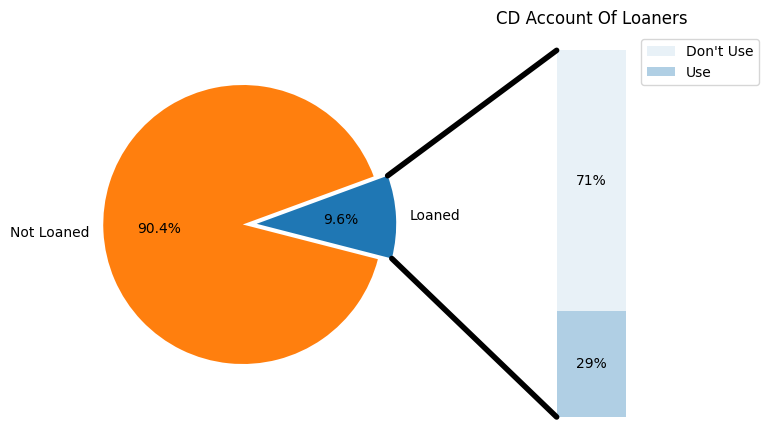

In [47]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [9.6, 90.4]
labels = ['Loaned', 'Not Loaned']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -1.5 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.29, .71]
age_labels = ['Use', 'Don\'t Use']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('CD Account Of Loaners')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig('CD_Accont.jpeg', dpi=1200)
plt.show()

پای چارت بالا نشان میدهد که برای سی اکانت هم مانند سکیوریتی اکانت افرادی که از ان استفاده نکردند با ۷۱ درصد بیشترین وام را دریافت کردند و در مقابل افرادی که از ان استفاده کردند  ۲۹ درصد وام را بخود اختصاص داده اند 

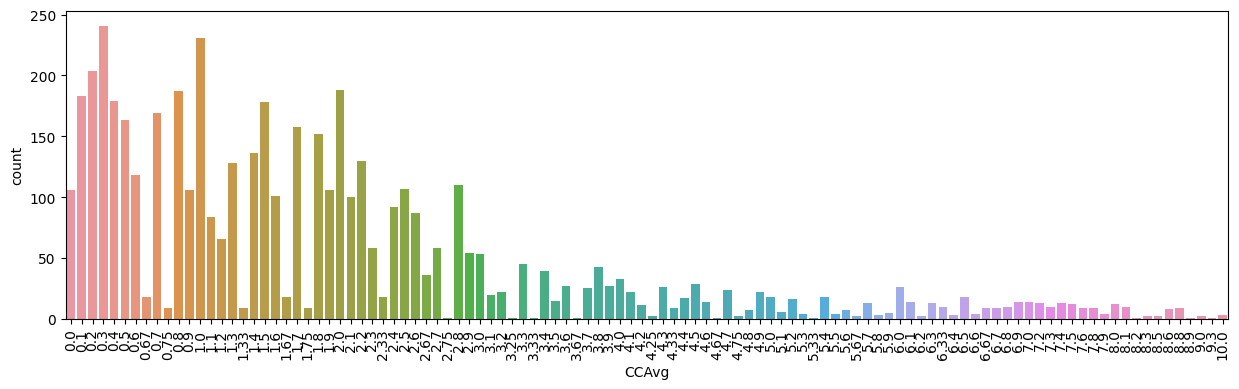

In [48]:
df_sort_ccavg =df.sort_values(by='CCAvg')
plt.figure(figsize=(15, 4))
sns.countplot(x='CCAvg', data=df_sort_ccavg)
plt.xticks(rotation=90)
plt.show()

در پلا زیر میتوانیم به تعداد افراد برای هر مقدار یونیک در هر فیچر دست پیدا کنیم

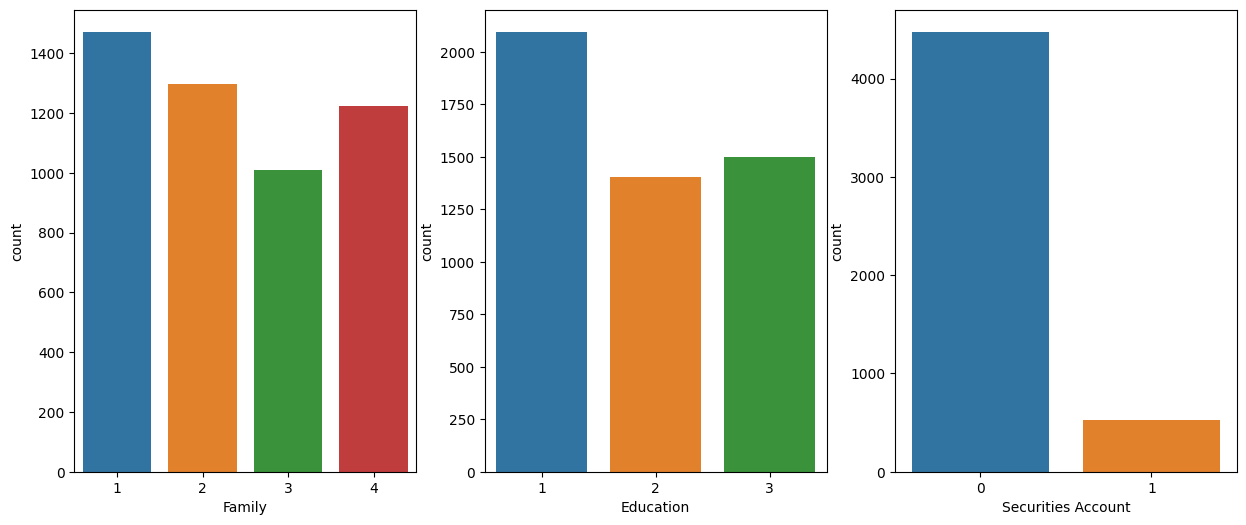

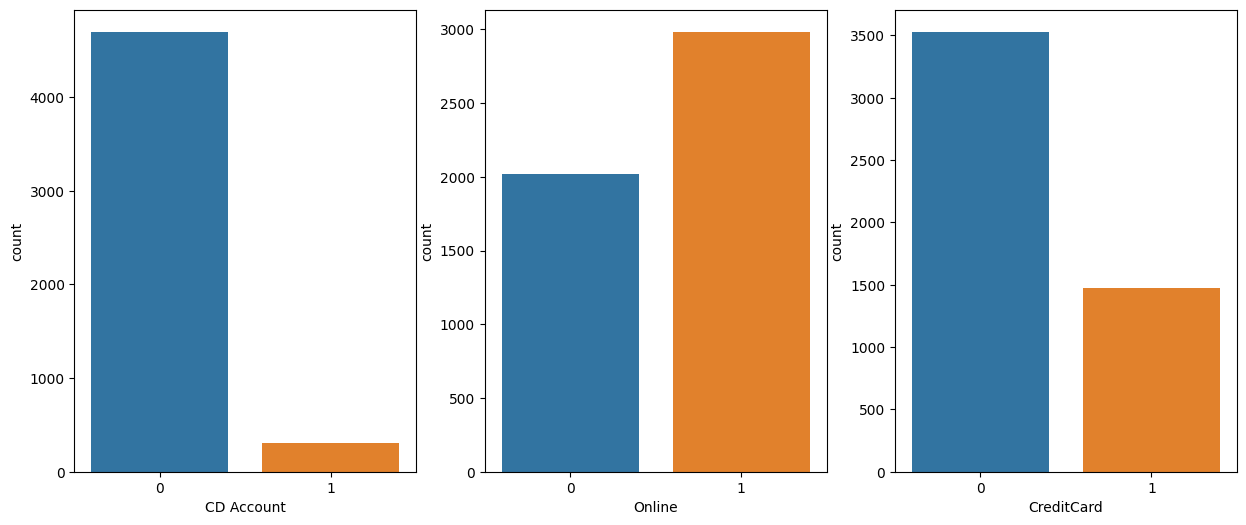

In [49]:
categorical = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15, 6])
    plt.subplot(1, 3, 1)
    sns.countplot(x=categorical[i], data=df)
    i +=1
    plt.subplot(1, 3, 2)
    sns.countplot(x=categorical[i], data=df)
    i += 1
    plt.subplot(1, 3, 3)
    sns.countplot(x=categorical[i], data=df)
    i += 1
    plt.show()

با توجه به پلات بالا بیشترین نمونه اماری برای افرادی با تعاد یک فرزند است و کمترین جامعه اماری برای افراد با ۳ فرزند است همچنین بیشترین جامعه اماری برای تحصیل نکرده ها و کمترین برای تحصیلات کردهاست, بیشترین جامعه اماری برای افرادی که ار سکیوریتی اکانت و سی دی اکانت و کریدت کارت خوداستفاده نکردند و در اخر بیشترین جامعه اماری برای افرادیست که از خدمات انلاین استفاده کردند 

باکس پلا زیر هم به راحتی مقادیر نویز در نمونه را میتواند مشخص کند

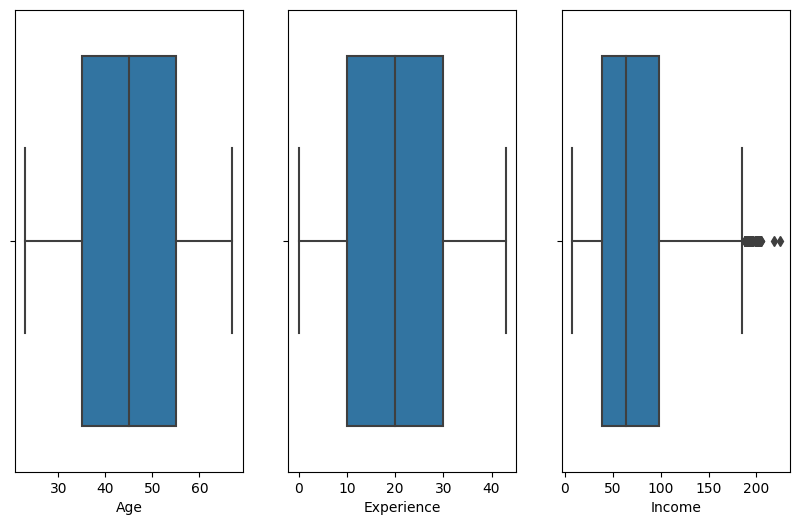

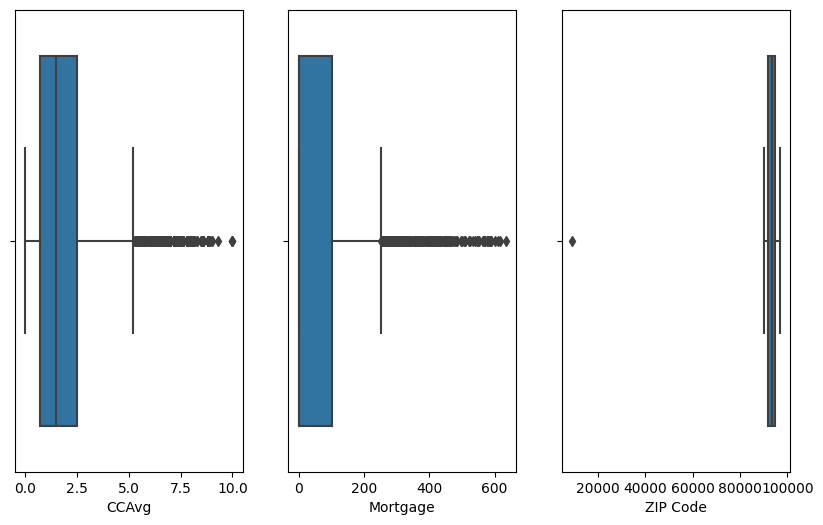

In [50]:
nomerical = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIP Code']
i = 0
while i < 4:
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=nomerical[i], data=df)
    i += 1
    plt.subplot(1, 3, 2)
    sns.boxplot(x=nomerical[i], data=df)
    i += 1
    plt.subplot(1, 3, 3)
    sns.boxplot(x=nomerical[i], data=df)
    i += 1
    plt.show()

میشود از اسکتر پلات هم برای یافتن بهتر نویز استفاده کرد که در این نمونه نویزی مشاهده نشد

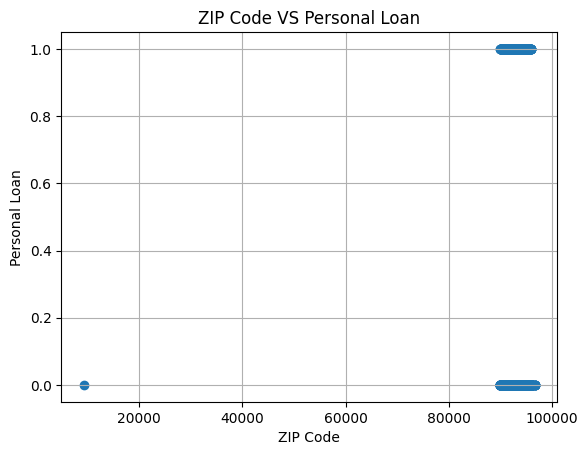

In [51]:
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.title('ZIP Code VS Personal Loan')
plt.xlabel('ZIP Code')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

در پلات بالا تموم زیپ کد ها در محدوده ی ۹۰۰۰۰ تا ۱۰۰۰۰۰ است جز یه داده که در محدوده ی زیر ۱۰۰۰ است

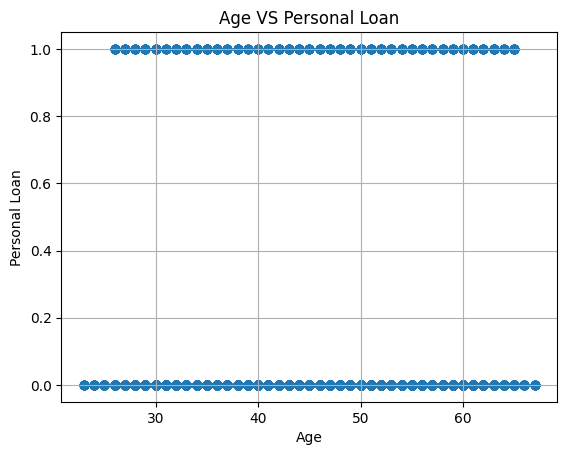

In [52]:
plt.scatter(df['Age'], df['Personal Loan'])
plt.title('Age VS Personal Loan')
plt.xlabel('Age')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

با توجه به اسکتر بالا افرادی که وام دریافت نکردند رنج بیشتری را داشته اند

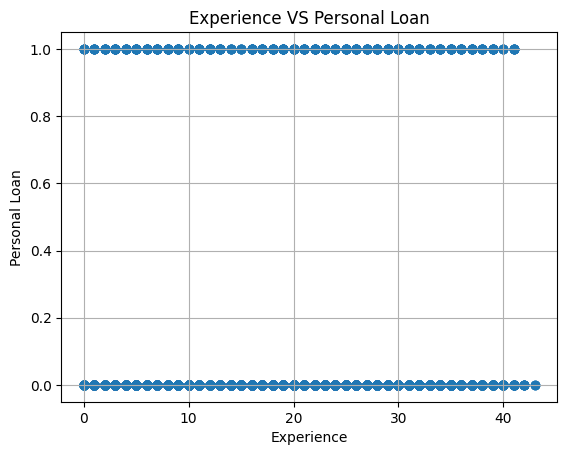

In [53]:
plt.scatter(df['Experience'], df['Personal Loan'])
plt.title('Experience VS Personal Loan')
plt.xlabel('Experience')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

با توجه با اسکتر بالا افراد بالای ۴۰ سال  درصد وام نگرفتن انها بیشتر مشاهده میشود

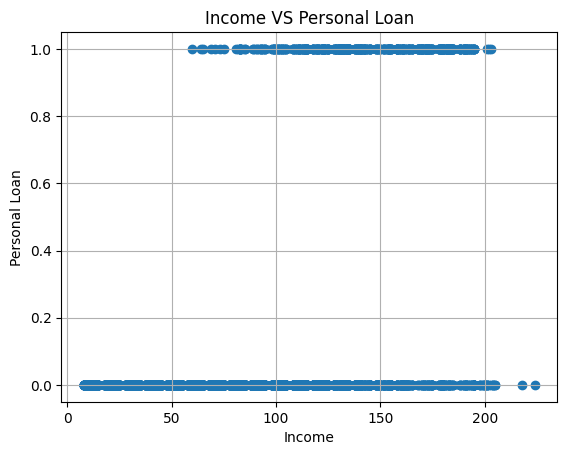

In [54]:
plt.scatter(df['Income'], df['Personal Loan'])
plt.title('Income VS Personal Loan')
plt.xlabel('Income')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

با توجه به پلات بالا  رنج دریافت وام از درامد بالای ۵۰ تا تقریبا حوالی ۲۰۰ تا مشاخده میشود در حالی که بالاتر از ۲۰۰ و کمتر از  حدود ۵۰ وامی دریافت نکردند

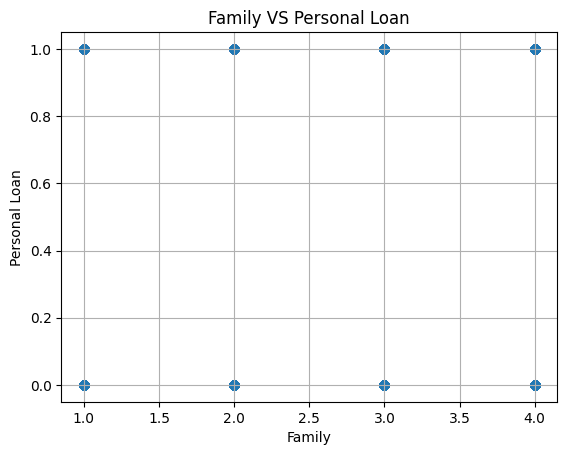

In [55]:
plt.scatter(df['Family'], df['Personal Loan'])
plt.title('Family VS Personal Loan')
plt.xlabel('Family')
plt.ylabel('Personal Loan')
plt.grid()
plt.show()

با توجه به اسکتر بالا  دریافت یا عدم دریافت وام در تمام خانوادها با جمعیت مختلف رخ داده

 # بررسی فیجر ها با هم و یافتن رابطه بین فیچر ها

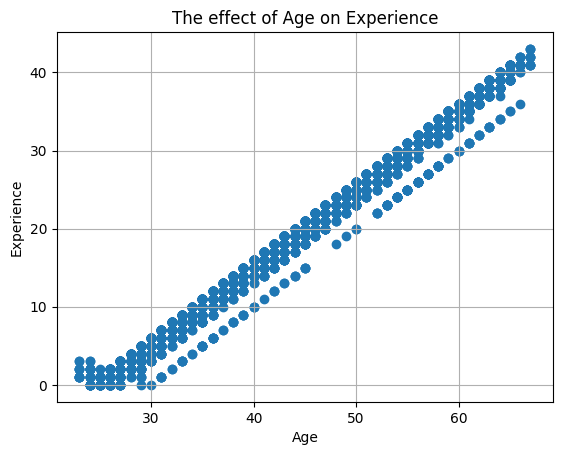

In [56]:
plt.scatter(df['Age'], df['Experience'])
plt.title('The effect of Age on Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.grid()
plt.show()

با توجه با اسکتر بالا با افزایش سن سابقه کاری افزایش یافته این یه نکته برای زمانیست که قصد ادغام فیچر ها برای افزایش اکتیاز در مدل را داریم میشود این دو فیچر را در هم ضرب کرد

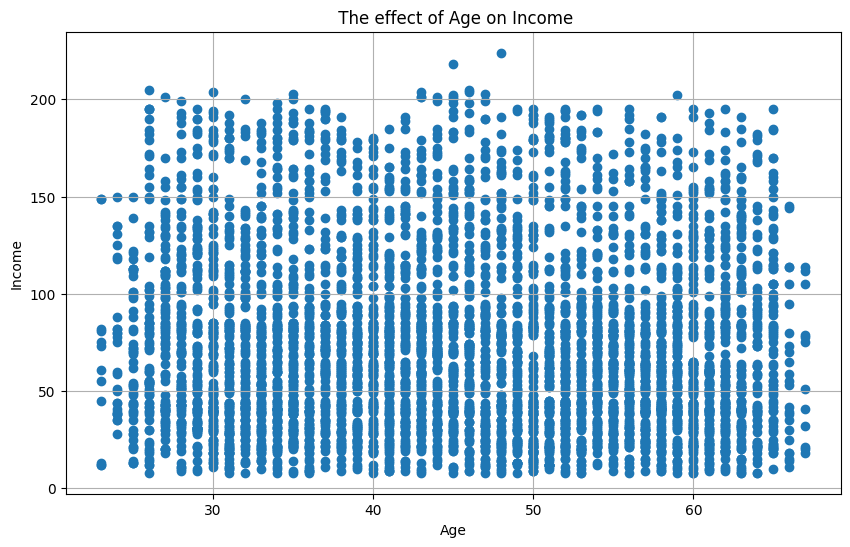

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'])
plt.title(' The effect of Age on Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در درامد زیر ۱۰۰ بیشتر مشاهده میشود

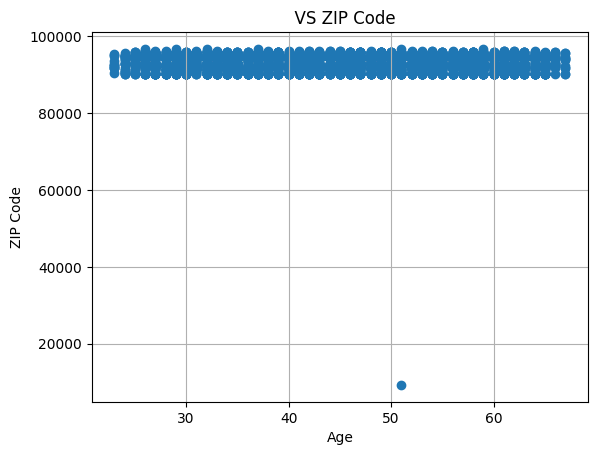

In [58]:
plt.scatter(df['Age'], df['ZIP Code'])
plt.title('  VS ZIP Code')
plt.xlabel('Age')
plt.ylabel('ZIP Code')
plt.grid()
plt.show()

با توجه به اسکتر بالا جز یک دیتا که در زیپ کد زیر ۱۰۰۰۰ وجود دارد و سن بالای ۵۰ دارد بقیه توزیعی بین ۹۰۰۰۰ تا ۱۰۰۰۰۰ دارند

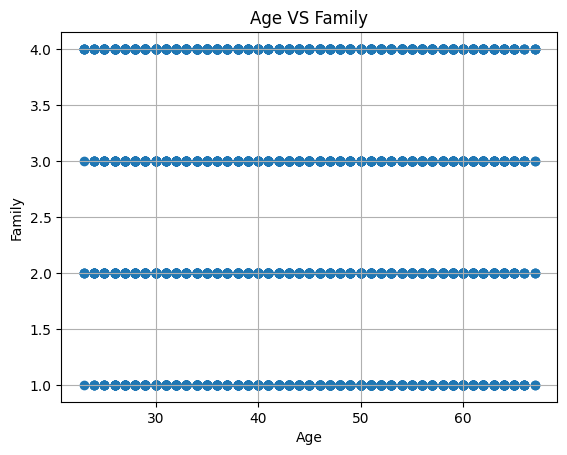

In [59]:
plt.scatter(df['Age'], df['Family'])
plt.title('Age VS Family')
plt.xlabel('Age')
plt.ylabel('Family')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در سن و تعداد اعضای خانواده یکسان است

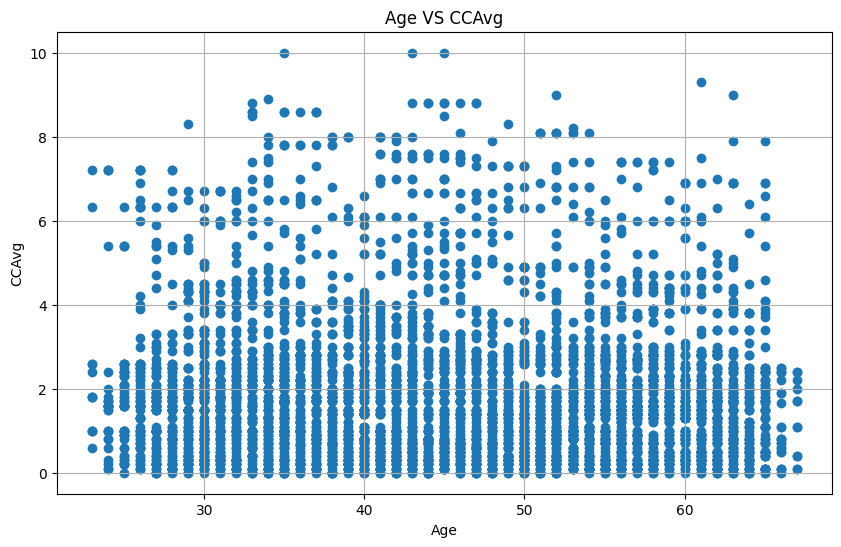

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['CCAvg'])
plt.title('Age VS CCAvg')
plt.xlabel('Age')
plt.ylabel('CCAvg')
plt.grid()
plt.show()

بت توجه ب اسکتر بالا توزیع در ccavrg صفر تا کمتر از ۴ مشاهده میشود

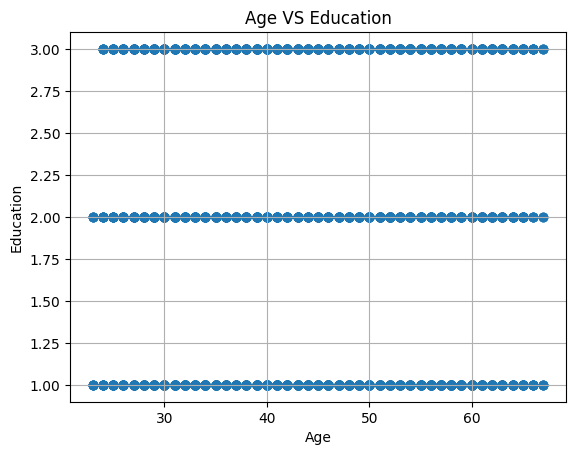

In [61]:
plt.scatter(df['Age'], df['Education'])
plt.title('Age VS Education')
plt.xlabel('Age')
plt.ylabel('Education')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در سن و تحصیلات تقریبا یکسان است

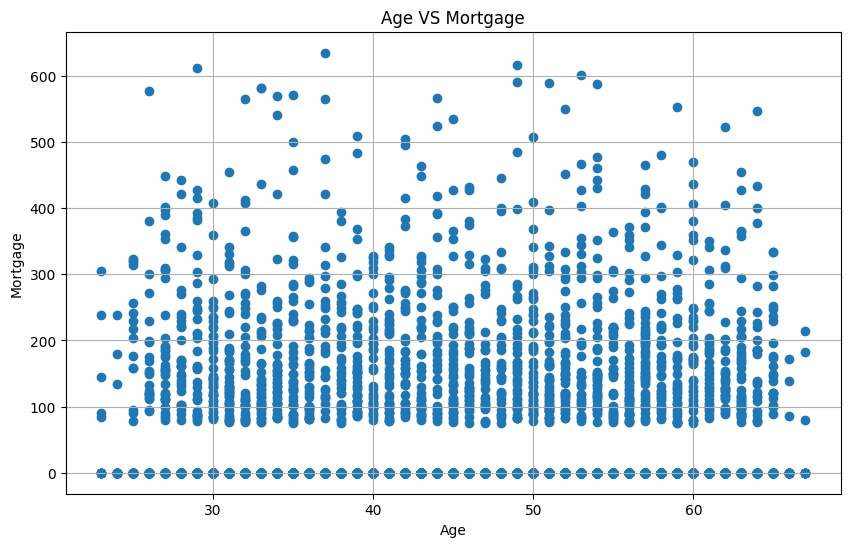

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Mortgage'])
plt.title('Age VS Mortgage')
plt.xlabel('Age')
plt.ylabel('Mortgage')
plt.grid()
plt.show()

پلات بالا نشان میدهد که بین مورترج صفر تا تقریبا ۹۰ توزیع وجود ندارد که باید با صاحب دیتا ست در مورد چرایی ان صحبت شود

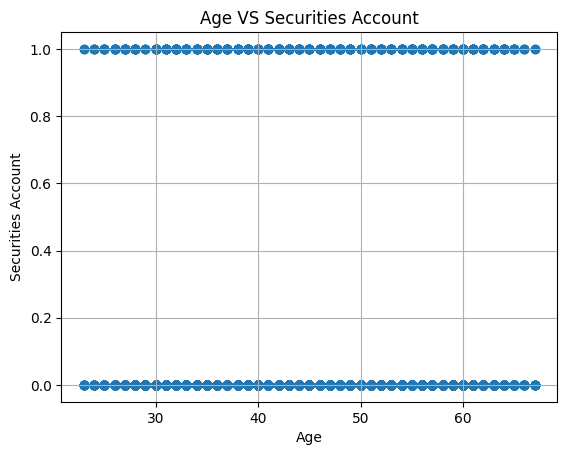

In [63]:
plt.scatter(df['Age'], df['Securities Account'])
plt.title('Age VS Securities Account')
plt.xlabel('Age')
plt.ylabel('Securities Account')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در سن و استفاده یا عدم استفاده از سکیوریتی اکانت  یکسان است

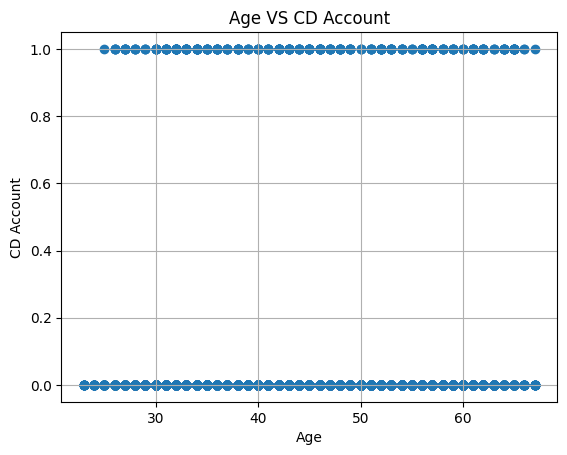

In [64]:
plt.scatter(df['Age'], df['CD Account'])
plt.title('Age VS CD Account')
plt.xlabel('Age')
plt.ylabel('CD Account')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در سن و استفاده یا عدم استفاده از سی دی اکانت تقریبا یکسان است
و تفاوت کوچک در عدد استفاده از سی دی اکانت برای سنین پایین تر است

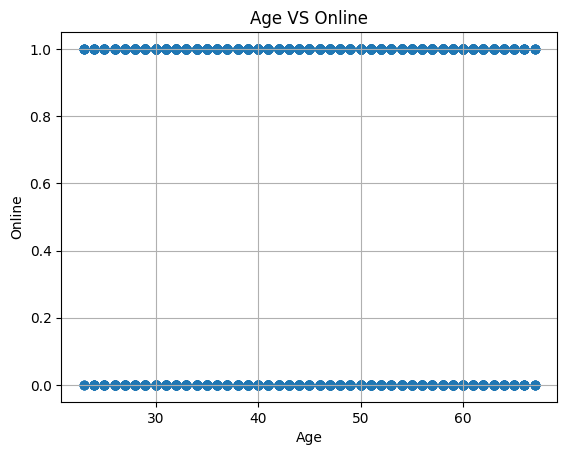

In [65]:
plt.scatter(df['Age'], df['Online'])
plt.title('Age VS Online')
plt.xlabel('Age')
plt.ylabel('Online')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در سن و استفاده یا عدم استفاده از خدمات انلاین  یکسان است

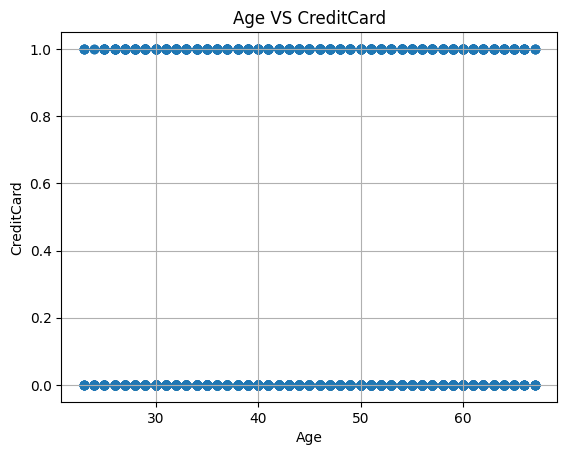

In [66]:
plt.scatter(df['Age'], df['CreditCard'])
plt.title('Age VS CreditCard')
plt.xlabel('Age')
plt.ylabel('CreditCard')
plt.grid()
plt.show()

با توجه با اسکتر بالا توزیع در سن و استفاده یا عدم استفاده از خدمات انلاین  یکسان است

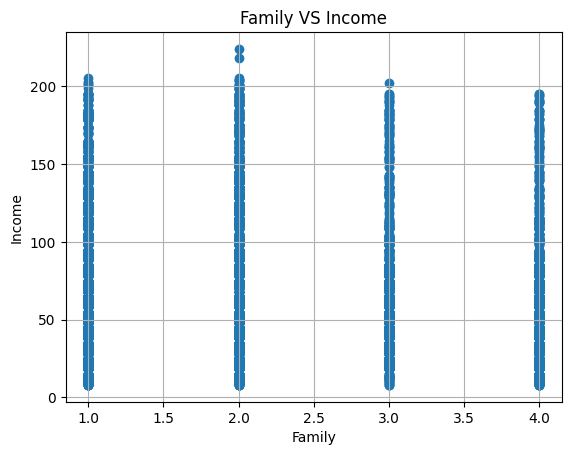

In [68]:
plt.scatter(df['Family'], df['Income'])
plt.title('Family VS Income')
plt.xlabel('Family')
plt.ylabel('Income')
plt.grid()
plt.show()

با توجه با پلات بالا کمتریت در امد برای خانواده چهارفرزندی و بیشتریت برای خانواده دو فرزندی است

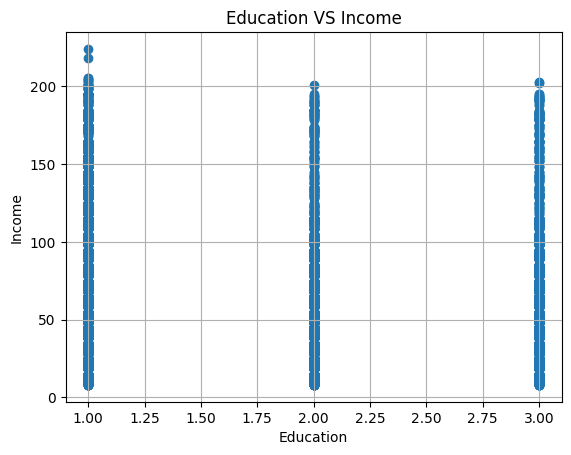

In [69]:
plt.scatter(df['Education'], df['Income'])
plt.title('Education VS Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.grid()
plt.show()

با توجه به پلات بالا بیشترین در امد برای افراد بدون تحصیلات است 

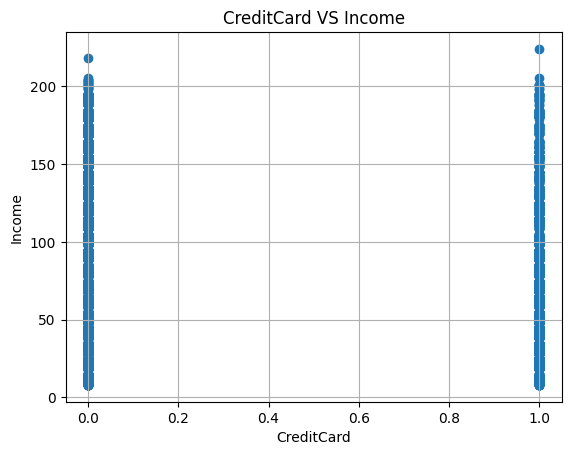

In [70]:
plt.scatter(df['CreditCard'], df['Income'])
plt.title('CreditCard VS Income')
plt.xlabel('CreditCard')
plt.ylabel('Income')
plt.grid()
plt.show()

با توجه به پلات بالا توزیع برای استفاده یا عدم استفاده از کردیت کارت برای درامد مختلف نشان میدهد استفاده کنند از کریدیت کارت  کمی دریافتی بیشتری دارند

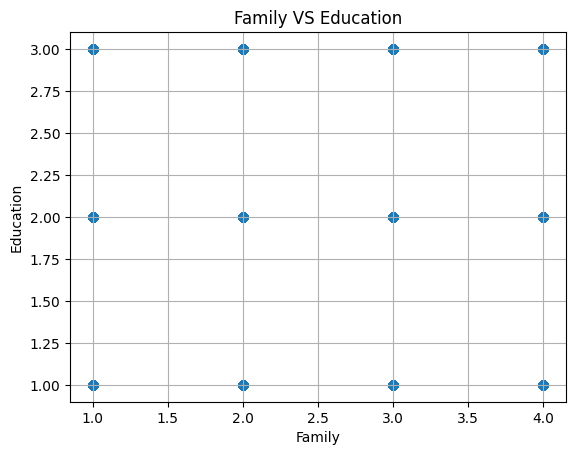

In [71]:
plt.scatter(df['Family'], df['Education'])
plt.title('Family VS Education')
plt.xlabel('Family')
plt.ylabel('Education')
plt.grid()
plt.show()

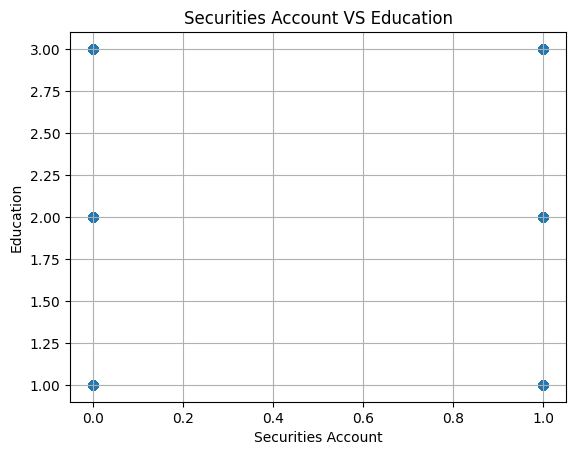

In [72]:
plt.scatter(df['Securities Account'], df['Education'])
plt.title('Securities Account VS Education')
plt.xlabel('Securities Account')
plt.ylabel('Education')
plt.grid()
plt.show()

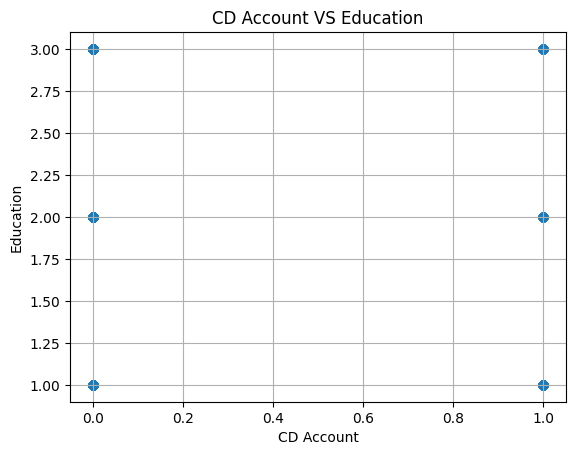

In [73]:
plt.scatter(df['CD Account'], df['Education'])
plt.title('CD Account VS Education')
plt.xlabel('CD Account')
plt.ylabel('Education')
plt.grid()
plt.show()

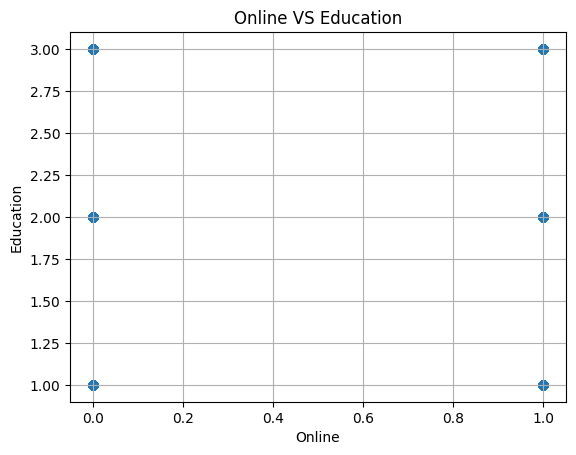

In [74]:
plt.scatter(df['Online'], df['Education'])
plt.title('Online VS Education')
plt.xlabel('Online')
plt.ylabel('Education')
plt.grid()
plt.show()

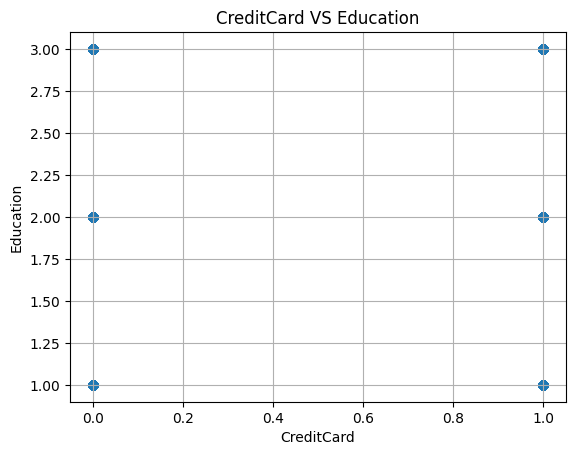

In [75]:
plt.scatter(df['CreditCard'], df['Education'])
plt.title('CreditCard VS Education')
plt.xlabel('CreditCard')
plt.ylabel('Education')
plt.grid()
plt.show()

In [76]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [77]:
df.drop('ID', axis=1, inplace=True)

In [78]:
df_sp = df.copy()

## Normalized

In [79]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
# unscaled = scaler.inverse_transform(scaled)
df = pd.DataFrame(scaled, columns=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ])

In [80]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.468247,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.096000,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.265470,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.232558,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.465116,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.697674,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# LogisticRegression MODEL

In [81]:
X = pd.DataFrame(df.drop('Personal Loan', axis=1))
y = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [82]:
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.441860,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.348837,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.209302,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.186047,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.093023,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.906977,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.930233,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [83]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [85]:
model_logreg = LogisticRegression()

In [86]:
model_logreg.fit(X_train, y_train.ravel())

LogisticRegression()

In [87]:
y_pred = model_logreg.predict(X_test)

In [88]:
model_logreg.classes_

array([0., 1.])

In [89]:
compare =pd.DataFrame({'actual': y_test.flatten(),
          'predict' : y_pred.flatten()})

In [90]:
compare

,actual,predict
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<h2>امتیاز</h2> 

In [91]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.955


In [92]:
model_logreg.score(X, y)

0.952

In [93]:
confusion_matrix(y, model_logreg.predict(X))

array([[4480,   40],
       [ 200,  280]])

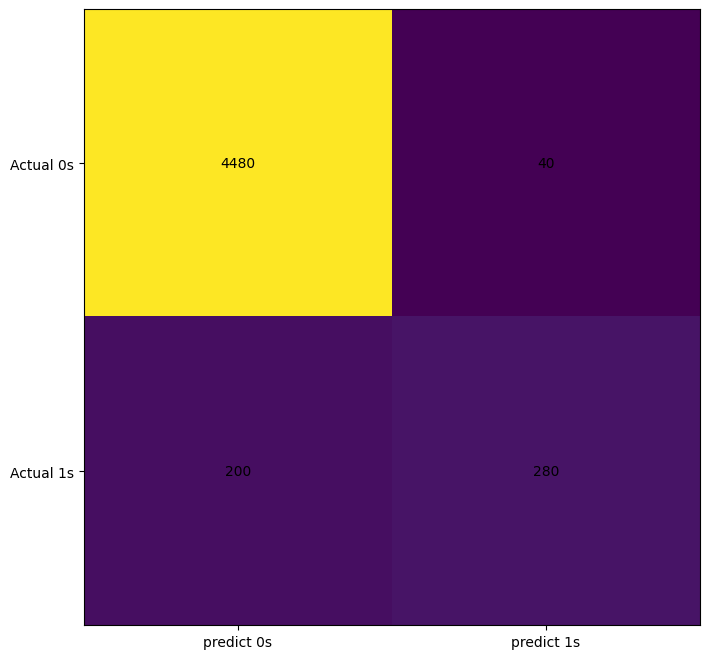

In [94]:
cm = confusion_matrix(y, model_logreg.predict(X)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

In [95]:
print(classification_report(y, model_logreg.predict(X)))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      4520
         1.0       0.88      0.58      0.70       480

    accuracy                           0.95      5000
   macro avg       0.92      0.79      0.84      5000
weighted avg       0.95      0.95      0.95      5000



## crass validation_logreg

In [96]:
kfold = KFold(10)
crros_val = cross_val_score(model_logreg, X_train, y_train.ravel(), cv= kfold)
print(crros_val)

[0.94   0.9425 0.9575 0.945  0.9425 0.9625 0.9425 0.9625 0.9625 0.945 ]


# MultinomialNB MODEL

In [97]:
X2 = pd.DataFrame(df.drop('Personal Loan', axis=1))
y2 = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [98]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, random_state=42)

In [99]:
model_NB = MultinomialNB()

In [100]:
model_NB.fit(X2_train, y2_train.ravel())

MultinomialNB()

In [101]:
y2_pred = model_NB.predict(X2_test)

In [102]:
compare2 =pd.DataFrame({'actual': y2_test.flatten(),
          'predict' : y2_pred.flatten()})
compare2

,actual,predict
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<h2>امتیاز</h2> 

In [103]:
print('Acourecy : ',metrics.accuracy_score(y2_test, y2_pred))

Acourecy :  0.895


In [104]:
model_NB.score(X2, y2)

0.9054

In [105]:
confusion_matrix(y2, model_NB.predict(X2))

array([[4520,    0],
       [ 473,    7]])

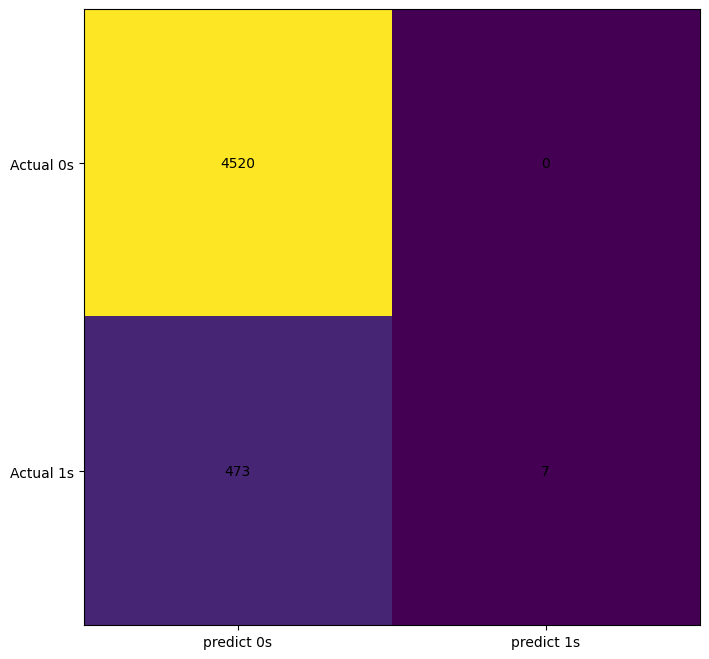

In [106]:
cm = confusion_matrix(y2, model_NB.predict(X2)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

In [107]:
print(classification_report(y2, model_NB.predict(X2)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4520
         1.0       1.00      0.01      0.03       480

    accuracy                           0.91      5000
   macro avg       0.95      0.51      0.49      5000
weighted avg       0.91      0.91      0.86      5000



## crass validation_NB

In [108]:
kfold2 = KFold(10)
cross_val_2 = cross_val_score(model_NB, X2_train, y2_train.ravel(), cv=kfold2)
print(cross_val_2)

[0.9    0.895  0.92   0.885  0.8925 0.9225 0.9125 0.935  0.92   0.8925]


In [109]:
print(np.mean(cross_val_2))

0.9075000000000001


# BernoulliNB MODEL

In [110]:
X3 = pd.DataFrame(df.drop('Personal Loan', axis=1))
y3 = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [111]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.2, random_state=42)

In [112]:
model_BNB = BernoulliNB()

In [113]:
model_BNB.fit(X3_train, y3_train.ravel())

BernoulliNB()

In [114]:
y3_pred = model_BNB.predict(X3_test)

In [115]:
compare3 =pd.DataFrame({'actual': y3_test.flatten(),
          'predict' : y3_pred.flatten()})
compare3

,actual,predict
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<h2>امتیاز</h2> 

In [116]:
print("Accurecy: ", metrics.accuracy_score(y3_test, y3_pred))

Accurecy:  0.903


In [117]:
confusion_matrix(y3, model_BNB.predict(X3))

array([[4450,   70],
       [ 387,   93]])

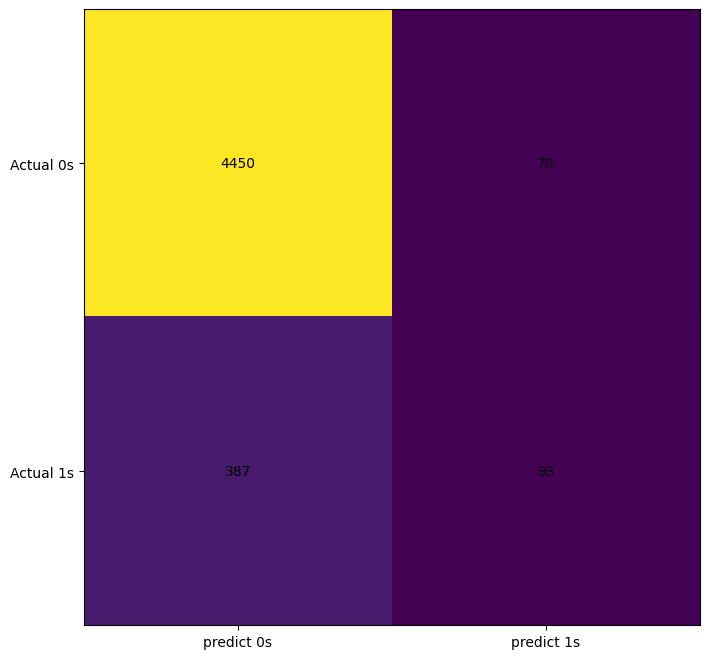

In [118]:
cm = confusion_matrix(y3, model_BNB.predict(X3)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

## cross_validation_BNB

In [119]:
kfold3 = KFold(20)
cross_val_3 = cross_val_score(model_BNB, X3_train, y3_train.ravel(), cv=kfold3)
print(cross_val_3)

[0.895 0.93  0.885 0.89  0.95  0.93  0.87  0.89  0.905 0.87  0.91  0.945
 0.9   0.93  0.925 0.95  0.905 0.915 0.91  0.89 ]


In [120]:
print(np.mean(cross_val_3))

0.9097500000000001


In [121]:
print(classification_report(y3, model_BNB.predict(X3)))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      4520
         1.0       0.57      0.19      0.29       480

    accuracy                           0.91      5000
   macro avg       0.75      0.59      0.62      5000
weighted avg       0.89      0.91      0.89      5000



 # KNeighborsClassifier MODEL

In [122]:
X4 = pd.DataFrame(df.drop('Personal Loan', axis=1)).values
y4 = pd.DataFrame(df['Personal Loan']).values.reshape(-1, 1)

In [123]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=.2, random_state=42)

In [124]:
# k = 10
k = 1 #! improve model(there are lines below) shows that(visually and numerically) the best k is one and i use it for my model
model_knn = KNeighborsClassifier(k)

In [125]:
model_knn.fit(X4_train, y4_train.ravel())

KNeighborsClassifier(n_neighbors=1)

In [126]:
y4_pred = model_knn.predict(X4_test)

In [127]:
compare4 =pd.DataFrame({'actual': y4_test.flatten(),
          'predict' : y4_pred.flatten()})
compare4

,actual,predict
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


In [128]:
print("Accurecy :", metrics.accuracy_score(y4_test, y4_pred))

Accurecy : 0.964


In [129]:
model_knn.score(X4, y4)

0.9928

In [130]:
confusion_matrix(y4, model_knn.predict(X4))

array([[4511,    9],
       [  27,  453]])

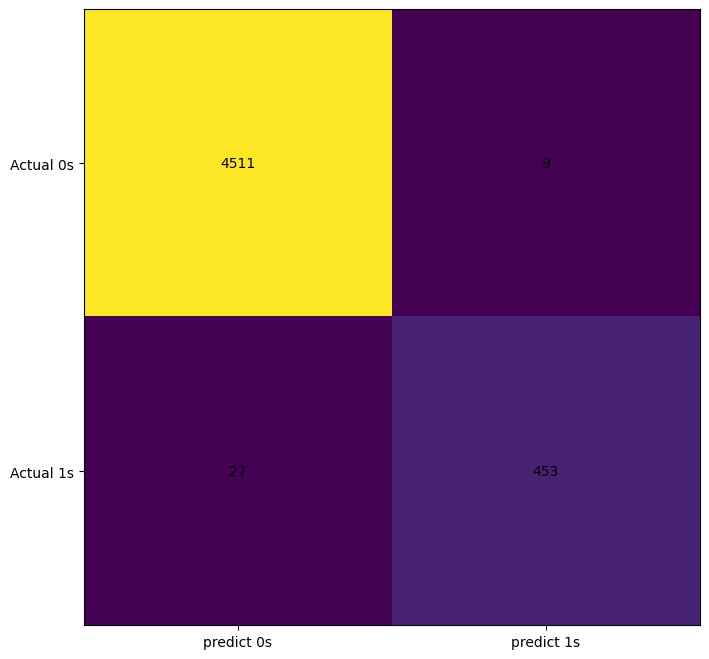

In [131]:
cm = confusion_matrix(y4, model_knn.predict(X4)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

In [132]:
print(classification_report(y4, model_knn.predict(X4)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4520
         1.0       0.98      0.94      0.96       480

    accuracy                           0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000



In [133]:
kfold4 = KFold(10)
cross_val_4 = cross_val_score(model_knn, X4_train, y4_train.ravel(), cv=kfold4)
print(cross_val_4)

[0.9575 0.9425 0.9725 0.965  0.9575 0.975  0.975  0.96   0.95   0.95  ]


In [134]:
print(np.mean(cross_val_4))

0.9604999999999999


# improve KNN model

In [135]:
k = 1000
Acc = np.zeros((k))
for i in range(1, k + 1):
    model_knn2 = KNeighborsClassifier(n_neighbors= i)
    model_knn2.fit(X4_train, y4_train.ravel())
    y5_pred = model_knn2.predict(X4_test)
    Acc[i - 1] = metrics.accuracy_score(y4_test, y5_pred)
    
Acc

array([0.964, 0.952, 0.961, 0.948, 0.958, 0.944, 0.951, 0.939, 0.942,
       0.942, 0.942, 0.935, 0.936, 0.933, 0.934, 0.931, 0.932, 0.929,
       0.93 , 0.93 , 0.933, 0.927, 0.932, 0.928, 0.928, 0.927, 0.927,
       0.924, 0.925, 0.925, 0.925, 0.923, 0.924, 0.922, 0.924, 0.922,
       0.924, 0.922, 0.923, 0.923, 0.926, 0.924, 0.924, 0.921, 0.922,
       0.922, 0.924, 0.922, 0.923, 0.919, 0.922, 0.92 , 0.92 , 0.917,
       0.918, 0.913, 0.913, 0.911, 0.911, 0.911, 0.912, 0.911, 0.911,
       0.91 , 0.91 , 0.909, 0.909, 0.909, 0.909, 0.909, 0.909, 0.909,
       0.909, 0.909, 0.91 , 0.909, 0.91 , 0.909, 0.909, 0.908, 0.908,
       0.908, 0.909, 0.908, 0.909, 0.908, 0.909, 0.907, 0.907, 0.906,
       0.906, 0.905, 0.905, 0.905, 0.905, 0.903, 0.904, 0.903, 0.903,
       0.903, 0.903, 0.9  , 0.902, 0.899, 0.899, 0.899, 0.899, 0.899,
       0.899, 0.899, 0.899, 0.899, 0.899, 0.897, 0.897, 0.897, 0.897,
       0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897, 0.897,
       0.897, 0.897,

In [136]:
print(np.min(Acc))
print(np.max(Acc))

0.895
0.964


 ## another way to calc of K in KNN

In [137]:
X4_2 = pd.DataFrame(df_sp.drop('Personal Loan', axis=1)).values
y4_2 = pd.DataFrame(df_sp['Personal Loan']).values.reshape(-1, 1)

In [138]:
X4_2_train, X4_2_test, y4_2_train, y4_2_test = train_test_split(X4_2, y4_2, test_size=.2, random_state=42)

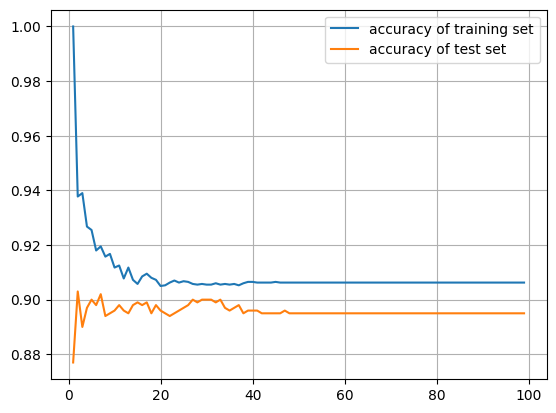

In [139]:
training_acc = []
test_acc = []
range_of_neighbors = range(1, 100)
for neighbors in range_of_neighbors:
    knn =KNeighborsClassifier(n_neighbors= neighbors)
    knn.fit(X4_2_train, y4_2_train.ravel())
    training_acc.append(knn.score(X4_2_train, y4_2_train))
    test_acc.append(knn.score(X4_2_test, y4_2_test))
plt.plot(range_of_neighbors, training_acc, label= 'accuracy of training set')
plt.plot(range_of_neighbors, test_acc, label='accuracy of test set')
plt.legend()
plt.grid()
plt.show()



# ensamble leraning

In [140]:
from sklearn.model_selection import GridSearchCV #! specially for KNN
parameters = {'n_neighbors': range(1, 100) }
grid_knn =GridSearchCV(
    estimator= knn, #!model
    param_grid= parameters, #! range of k
    scoring= 'accuracy',
    cv= 5, #! crass_val_generator
    verbose= 1, #! time to calc
    n_jobs= -1, #! cpu helper

)
grid_knn.fit(X4_train, y4_train.ravel())

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=99), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100)}, scoring='accuracy',
             verbose=1)

In [141]:
grid_knn.best_params_

{'n_neighbors': 1}

<h1> New Feature For Predict</h1>

In [142]:
import warnings
warnings.filterwarnings("ignore")

In [143]:
new_feature_knn = model_knn.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_knn

array([0.])

In [144]:
new_feature_logreg = model_logreg.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_logreg

array([0.])

In [145]:
new_feature_NB = model_NB.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_NB

array([0.])

In [146]:
new_feature_BNB = model_BNB.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])
new_feature_BNB

array([0.])

<h4> با توجه به مقادیر بالا هر چهار مدل عدد صفر را نشان داده که نشان دهنده تمایل به نگرفتن وام توسط آن مخاطب جدید با داده های ورودی جدید به تمام مدل هااست</h4>

<h2>ساخت مدل ماشین لرنینگ با استفاده از الگوریتم مختلف که توسط کارفرما عدد گزاری و انتخاب شود و در نهایت جواب را برگرداند<h2>

In [147]:

def predict():
    Age = int(input('Enter costomer Age :'))
    Experience = int(input('Enter customer Experience :'))
    Income = int(input('Enter customer Income :'))
    ZIP_Code = int(input('Enter customer ZIP Code :'))
    Family = int(input('Enter customer Family :'))
    CCAvg = float(input('Enter customer CCAvg :'))
    Education = int(input('Enter customer Education :'))
    Mortgage = int(input('Enter customer Mortgage :'))
    Securities_Account	= int(input('Enter customer Securities Account :'))
    CD_Account	= int(input('Enter customer CD Account :'))
    Online = int(input('Enter customer Online :'))
    CreditCard = int(input('Enter customer CreditCard :'))
    Choose_model = input("please choose  MODEL that you want to use(KNN, LOGREG, NB, BNB, ALL) :")
    if Choose_model == 'KNN':
        new_feature_KNN = model_knn.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        for i in new_feature_KNN:
            if i == 0:
                print("your client does not want loan")
            if i == 1:
                print("your client wants loan")
         
    elif  Choose_model == 'LOGREG':
        new_feature_LOGREG = model_logreg.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        for i in new_feature_LOGREG:
            if i == 0:
                print("your client does not want loan")
            if i == 1:
                print("your client wants loan")
    elif  Choose_model == 'NB':
        new_feature_NB = model_NB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        for i in new_feature_NB:
            if i == 0:
                print("your client does not want loan")
            if i == 1:
                print("your client wants loan")
    elif Choose_model == 'BNB':
        new_feature_BNB = model_BNB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        for i in new_feature_BNB:
            if i == 0:
                print("your client does not want loan")
            if i == 1:
                print("your client wants loan")
    elif Choose_model == 'ALL':

        new_feature_KNN = model_knn.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        new_feature_LOGREG = model_logreg.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        new_feature_NB = model_NB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])
        new_feature_BNB = model_BNB.predict([[Age, Experience, Income, ZIP_Code, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard]])

        Values = {'KNN' : new_feature_KNN , 'LOGREG' : new_feature_LOGREG, 'NB' : new_feature_NB, 'NBN' : new_feature_BNB}
        models = ["KNN", "LOGREG", "NB", "BNB"]
        counter = 0
        predict = []
        for i in Values.values():
            for value in i: 
                if i == 0:
                    print(f'your client does not want loan "predict by {models[counter]} Model"')
                    counter += 1
                    predict.append(0)
                if i == 1:
                    print(f'your client wants loan "predict by {models[counter]} Model"')
                    counter += 1
                    predict.append(0)
        best_value = statistics.mode(predict)
        if best_value == 0:
            print(f'\n \t \t \t "The results of the models show that your client does not want loan"')
        if best_value == 1:
            print(f'\n \t \t \t "The results of the models show that your client wants loan"')
predict()


your client does not want loan "predict by KNN Model"
your client does not want loan "predict by LOGREG Model"
your client does not want loan "predict by NB Model"
your client does not want loan "predict by BNB Model"

 	 	 	 "The results of the models show that your client does not want loan"
